In [ ]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load Data
df_raw = pd.read_csv('data/sales.csv')
df_raw.head()

,date,city,product,units,unit_price,discount
0,2025-01-03,New York,Laptop,3,1200,0.10
1,2025-01-04,Chicago,Tablet,5,450,0.05
2,2025-01-05,San Francisco,Smartphone,8,800,0.08
3,2025-01-06,Los Angeles,Headphones,12,150,0.15
4,2025-01-07,Seattle,Smartwatch,6,300,0.10


In [ ]:
# Create a clean copy of the data for analysis
df = df_raw.copy()
# Fill missing values in the 'discount' column with 0
df["discount"] = df["discount"].fillna(0)

In [ ]:
# Drop rows where 'units' is missing, as we cannot analyze sales without this information
df = df.dropna(subset=["units"])

In [15]:
# Convert 'date' column to datetime format, coercing errors to NaT
df["date"] = pd.to_datetime(df["date"], errors="coerce")
# Enforce numeric type safety
df["units"] = pd.to_numeric(df["units"], errors="coerce")
df["unit_price"] = pd.to_numeric(df["unit_price"], errors="coerce")
df["discount"] = pd.to_numeric(df["discount"], errors="coerce")

# Drop any invalid rows that could not be converted
df  = df.dropna(subset=["date", "units", "unit_price", "discount"])

# Final Type casting
df["units"] = df["units"].astype(int)
df["unit_price"] = df["unit_price"].astype(float)
df["discount"] = df["discount"].astype(float)


In [ ]:
# Feature Engineering
df["gross"] = df["units"] * df["unit_price"]
df["net"] = df["gross"] - (1.0 - df["discount"])

Text(0.5, 1.0, 'Net Sales Over Time')

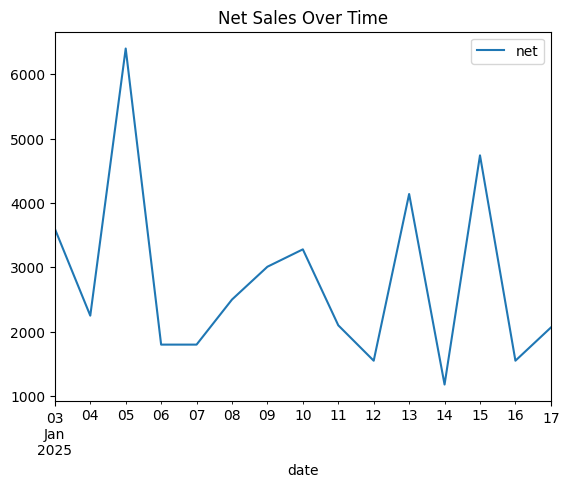

In [19]:
df.plot(x="date", y="net", kind="line")
plt.title("Net Sales Over Time")